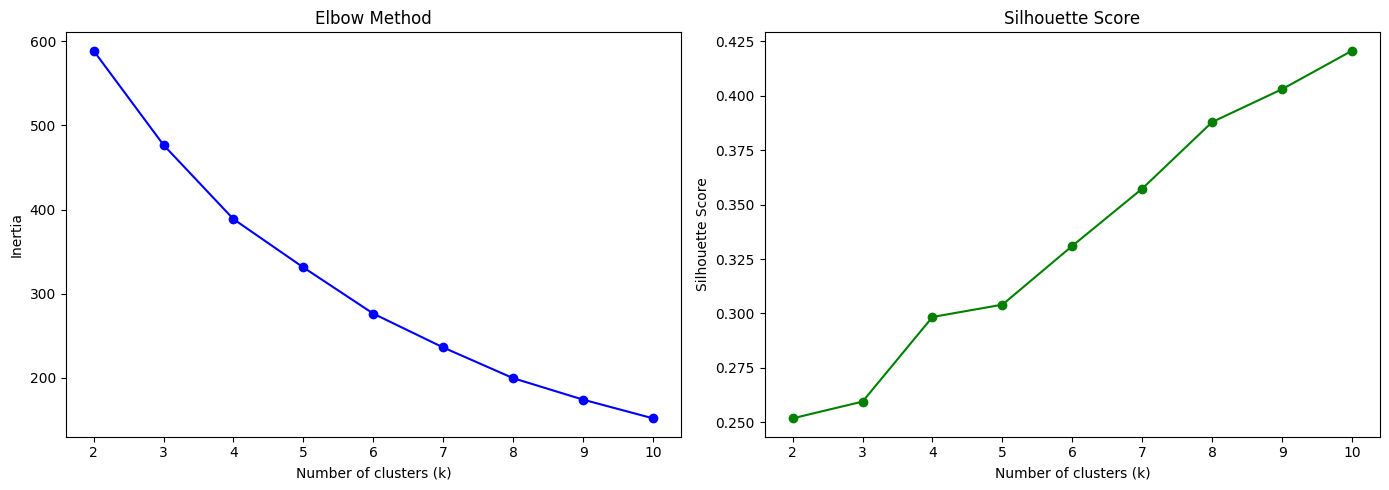


✅ Best number of clusters: 10


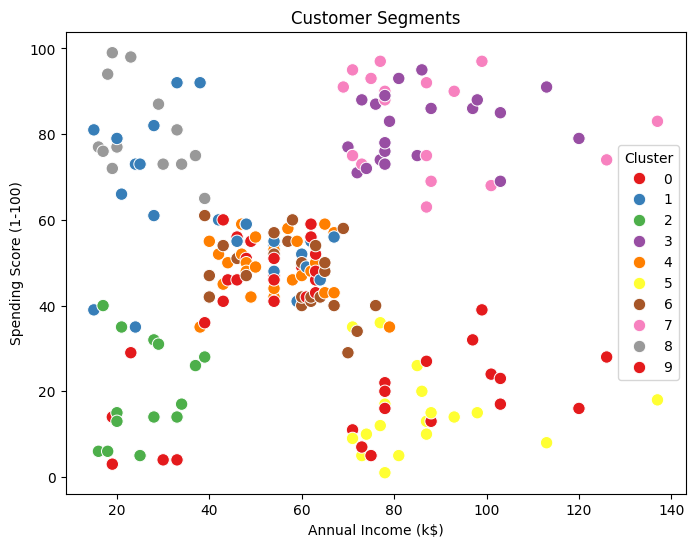

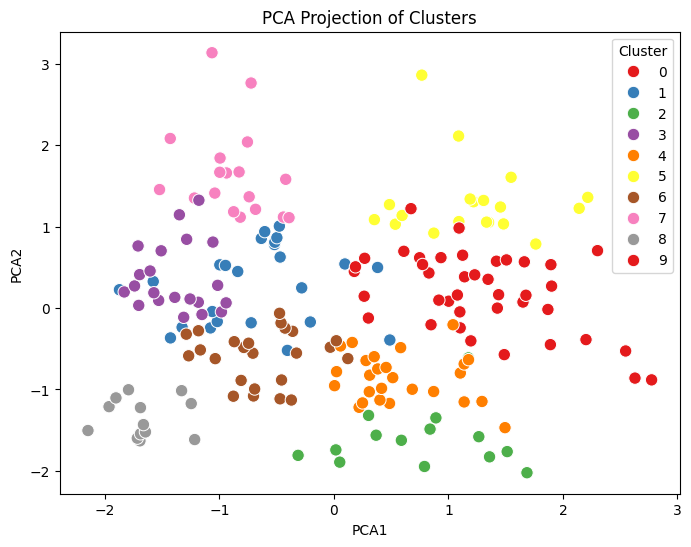

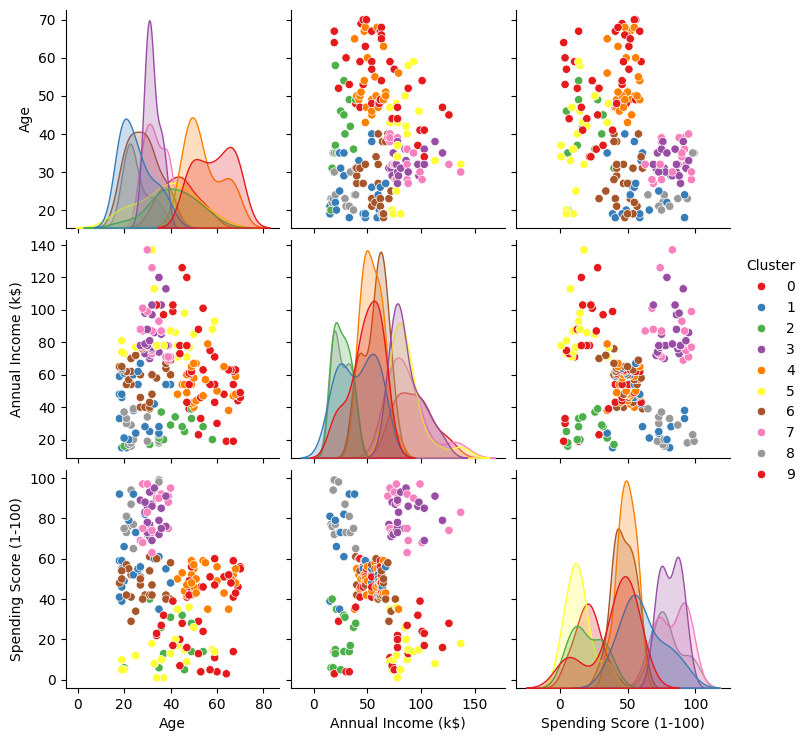


🎯 Cluster Profiling Summary:

               Age  Annual Income (k$)  Spending Score (1-100)  \
Cluster                                                          
0        58.846154           48.692308               39.846154   
1        25.250000           41.250000               60.916667   
2        41.214286           26.071429               20.142857   
3        32.190476           86.047619               81.666667   
4        54.153846           54.230769               48.961538   
5        38.473684           85.894737               14.210526   
6        27.960000           57.360000               47.120000   
7        33.277778           87.111111               82.666667   
8        25.461538           25.692308               80.538462   
9        43.785714           93.285714               20.642857   

         Number of Customers  
Cluster                       
0                         26  
1                         24  
2                         14  
3                    

In [1]:
# Step 1: Load Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

# Step 2: Load Data (replace with your own file if needed)
data = pd.read_csv('C:\\Users\\Admin\\Downloads\\archive (1)\\Mall_Customers.csv')

# Step 3: Encode 'Gender'
le = LabelEncoder()
data['Gender'] = le.fit_transform(data['Gender'])

# Step 4: Select Features
features = data[['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# Step 5: Standardize Features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Step 6: Find Optimal K (Elbow + Silhouette)
inertia = []
silhouette = []
K = range(2, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)
    silhouette.append(silhouette_score(scaled_features, kmeans.labels_))

# Elbow Plot
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method')

# Silhouette Plot
plt.subplot(1, 2, 2)
plt.plot(K, silhouette, 'go-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score')

plt.tight_layout()
plt.show()

# Step 7: Select best K based on silhouette score
optimal_k = K[np.argmax(silhouette)]
print(f"\n✅ Best number of clusters: {optimal_k}")

# Step 8: Apply KMeans with best K
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
data['Cluster'] = kmeans.fit_predict(scaled_features)

# Step 9: 2D Cluster Plot (Income vs Spending Score)
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', palette='Set1', s=80)
plt.title('Customer Segments')
plt.show()

# Step 10: PCA Visualization
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_features)
data['PCA1'] = pca_result[:, 0]
data['PCA2'] = pca_result[:, 1]

plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='PCA1', y='PCA2', hue='Cluster', palette='Set1', s=80)
plt.title('PCA Projection of Clusters')
plt.show()

# Step 11: Full Pairplot
sns.pairplot(data, vars=['Age', 'Annual Income (k$)', 'Spending Score (1-100)'], hue='Cluster', palette='Set1')
plt.show()

# Step 12: Cluster Profiling
profile = data.groupby('Cluster').agg({
    'Age': 'mean',
    'Annual Income (k$)': 'mean',
    'Spending Score (1-100)': 'mean',
    'CustomerID': 'count'
}).rename(columns={'CustomerID': 'Number of Customers'})

print("\n🎯 Cluster Profiling Summary:\n")
print(profile)


In [2]:
#data used

# CustomerID	Gender	Age	Annual Income (k$)	Spending Score (1-100)
# 1	Male	19	15	39
# 2	Male	21	15	81
# 3	Female	20	16	6
# 4	Female	23	16	77
# 5	Female	31	17	40
# 6	Female	22	17	76
# 7	Female	35	18	6
# 8	Female	23	18	94
# 9	Male	64	19	3
# 10	Female	30	19	72
# 11	Male	67	19	14
# 12	Female	35	19	99
# 13	Female	58	20	15
# 14	Female	24	20	77
# 15	Male	37	20	13
# 16	Male	22	20	79
# 17	Female	35	21	35
# 18	Male	20	21	66
# 19	Male	52	23	29
# 20	Female	35	23	98
# 21	Male	35	24	35
# 22	Male	25	24	73
# 23	Female	46	25	5
# 24	Male	31	25	73
# 25	Female	54	28	14
# 26	Male	29	28	82
# 27	Female	45	28	32
# 28	Male	35	28	61
# 29	Female	40	29	31
# 30	Female	23	29	87
# 31	Male	60	30	4
# 32	Female	21	30	73
# 33	Male	53	33	4
# 34	Male	18	33	92
# 35	Female	49	33	14
# 36	Female	21	33	81
# 37	Female	42	34	17
# 38	Female	30	34	73
# 39	Female	36	37	26
# 40	Female	20	37	75
# 41	Female	65	38	35
# 42	Male	24	38	92
# 43	Male	48	39	36
# 44	Female	31	39	61
# 45	Female	49	39	28
# 46	Female	24	39	65
# 47	Female	50	40	55
# 48	Female	27	40	47
# 49	Female	29	40	42
# 50	Female	31	40	42
# 51	Female	49	42	52
# 52	Male	33	42	60
# 53	Female	31	43	54
# 54	Male	59	43	60
# 55	Female	50	43	45
# 56	Male	47	43	41
# 57	Female	51	44	50
# 58	Male	69	44	46
# 59	Female	27	46	51
# 60	Male	53	46	46
# 61	Male	70	46	56
# 62	Male	19	46	55
# 63	Female	67	47	52
# 64	Female	54	47	59
# 65	Male	63	48	51
# 66	Male	18	48	59
# 67	Female	43	48	50
# 68	Female	68	48	48
# 69	Male	19	48	59
# 70	Female	32	48	47
# 71	Male	70	49	55
# 72	Female	47	49	42
# 73	Female	60	50	49
# 74	Female	60	50	56
# 75	Male	59	54	47
# 76	Male	26	54	54
# 77	Female	45	54	53
# 78	Male	40	54	48
# 79	Female	23	54	52
# 80	Female	49	54	42
# 81	Male	57	54	51
# 82	Male	38	54	55
# 83	Male	67	54	41
# 84	Female	46	54	44
# 85	Female	21	54	57
# 86	Male	48	54	46
# 87	Female	55	57	58
# 88	Female	22	57	55
# 89	Female	34	58	60
# 90	Female	50	58	46
# 91	Female	68	59	55
# 92	Male	18	59	41
# 93	Male	48	60	49
# 94	Female	40	60	40
# 95	Female	32	60	42
# 96	Male	24	60	52
# 97	Female	47	60	47
# 98	Female	27	60	50
# 99	Male	48	61	42
# 100	Male	20	61	49
# 101	Female	23	62	41
# 102	Female	49	62	48
# 103	Male	67	62	59
# 104	Male	26	62	55
# 105	Male	49	62	56
# 106	Female	21	62	42
# 107	Female	66	63	50
# 108	Male	54	63	46
# 109	Male	68	63	43
# 110	Male	66	63	48
# 111	Male	65	63	52
# 112	Female	19	63	54
# 113	Female	38	64	42
# 114	Male	19	64	46
# 115	Female	18	65	48
# 116	Female	19	65	50
# 117	Female	63	65	43
# 118	Female	49	65	59
# 119	Female	51	67	43
# 120	Female	50	67	57
# 121	Male	27	67	56
# 122	Female	38	67	40
# 123	Female	40	69	58
# 124	Male	39	69	91
# 125	Female	23	70	29
# 126	Female	31	70	77
# 127	Male	43	71	35
# 128	Male	40	71	95
# 129	Male	59	71	11
# 130	Male	38	71	75
# 131	Male	47	71	9
# 132	Male	39	71	75
# 133	Female	25	72	34
# 134	Female	31	72	71
# 135	Male	20	73	5
# 136	Female	29	73	88
# 137	Female	44	73	7
# 138	Male	32	73	73
# 139	Male	19	74	10
# 140	Female	35	74	72
# 141	Female	57	75	5
# 142	Male	32	75	93
# 143	Female	28	76	40
# 144	Female	32	76	87
# 145	Male	25	77	12
# 146	Male	28	77	97
# 147	Male	48	77	36
# 148	Female	32	77	74
# 149	Female	34	78	22
# 150	Male	34	78	90
# 151	Male	43	78	17
# 152	Male	39	78	88
# 153	Female	44	78	20
# 154	Female	38	78	76
# 155	Female	47	78	16
# 156	Female	27	78	89
# 157	Male	37	78	1
# 158	Female	30	78	78
# 159	Male	34	78	1
# 160	Female	30	78	73
# 161	Female	56	79	35
# 162	Female	29	79	83
# 163	Male	19	81	5
# 164	Female	31	81	93
# 165	Male	50	85	26
# 166	Female	36	85	75
# 167	Male	42	86	20
# 168	Female	33	86	95
# 169	Female	36	87	27
# 170	Male	32	87	63
# 171	Male	40	87	13
# 172	Male	28	87	75
# 173	Male	36	87	10
# 174	Male	36	87	92
# 175	Female	52	88	13
# 176	Female	30	88	86
# 177	Male	58	88	15
# 178	Male	27	88	69
# 179	Male	59	93	14
# 180	Male	35	93	90
# 181	Female	37	97	32
# 182	Female	32	97	86
# 183	Male	46	98	15
# 184	Female	29	98	88
# 185	Female	41	99	39
# 186	Male	30	99	97
# 187	Female	54	101	24
# 188	Male	28	101	68
# 189	Female	41	103	17
# 190	Female	36	103	85
# 191	Female	34	103	23
# 192	Female	32	103	69
# 193	Male	33	113	8
# 194	Female	38	113	91
# 195	Female	47	120	16
# 196	Female	35	120	79
# 197	Female	45	126	28
# 198	Male	32	126	74
# 199	Male	32	137	18
# 200	Male	30	137	83
